# Zip Code Tabulation Areas

[Zip Code Tabulation Areas](https://www.census.gov/programs-surveys/geography/guidance/geo-areas/zctas.html) (ZCTAs) are not exactly zip codes, but they are close.
They are polygons that enclose areas containing home delivery locations within
a U.S. Postal Service Zip Code. Not all valid postal Zip Codes have a corresponding
ZCTA, because some are commercial and contain no residences.

In this notebook we will show how to download data at the ZCTA level.

We will also demonstrate the change that the U.S. Census Bureau made to their
data model in 2020. Prior to that, zip code tabulation areas were nested inside of states.
But starting in 2020, zip code tabulation areas were at the top level
of the geography hierarchy. So we have to query them in a slightly different way
depending on what vintage we are interested in.

In [1]:
import censusdis.data as ced
import censusdis.maps as cem
from censusdis.datasets import ACS5
from censusdis.states import CO, AZ, ID, MT, NV, NM, UT, WY, ABBREVIATIONS_FROM_IDS

In [2]:
states = [CO, AZ, ID, MT, NV, NM, UT, WY]

state_abbrevs = [ABBREVIATIONS_FROM_IDS[state] for state in states]

In [3]:
# A dictionary to collect our results.
gdfs_by_year = {}

## Pre-2020

Prior to 2020, zip code tabulation areas were nested inside of states.
So we can query them with a normal call to `ced.download`.

In [4]:
for year in 2018, 2019:
    gdfs_by_year[year] = ced.download(
        ACS5,
        year,
        ["NAME"],
        group="B01003",
        state=states,
        zip_code_tabulation_area="*",
        with_geometry=True,
    )

## 2020 and Later

Starting in 2020, zip code tabulation areas were at the top level
of the geography hierarchy. So if we want to get only those contained
in certain states, then we have to use the `ced.contained_within().download()`
idiom.

In [5]:
for year in 2020, 2022:
    gdfs_by_year[year] = ced.contained_within(state=states).download(
        ACS5,
        year,
        ["NAME"],
        group="B01003",
        zip_code_tabulation_area="*",
        with_geometry=True,
    )

## Plot All Years

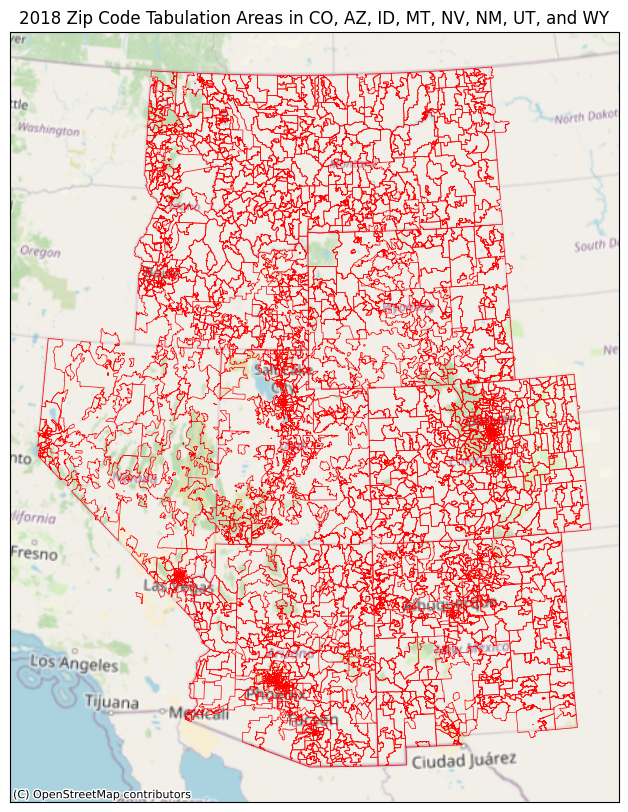

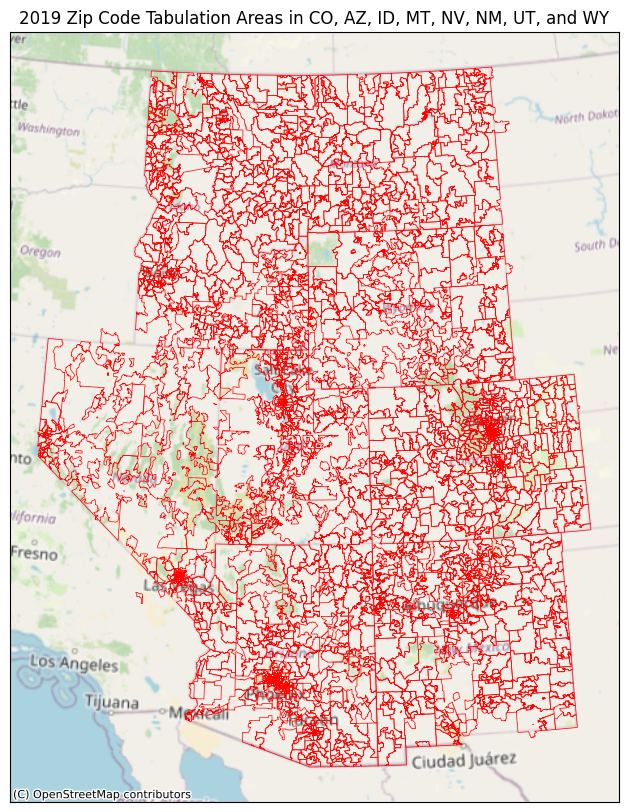

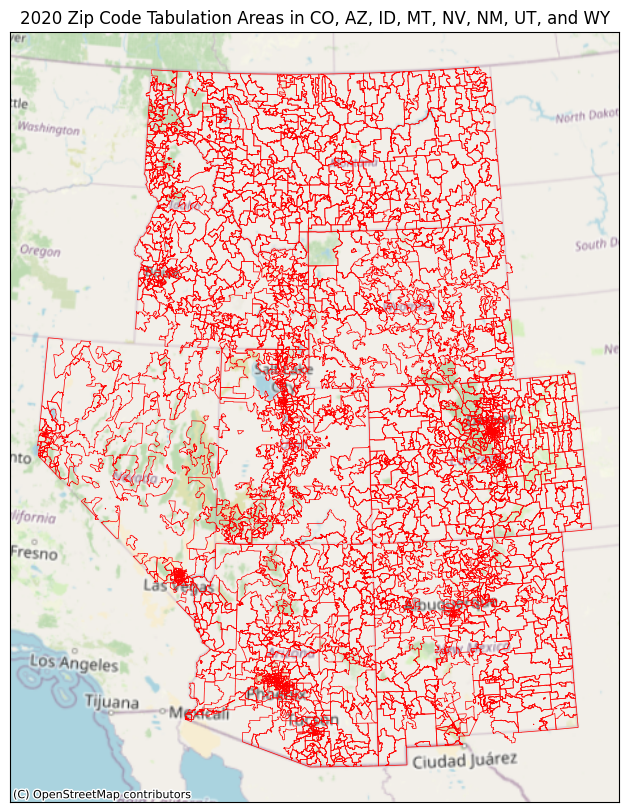

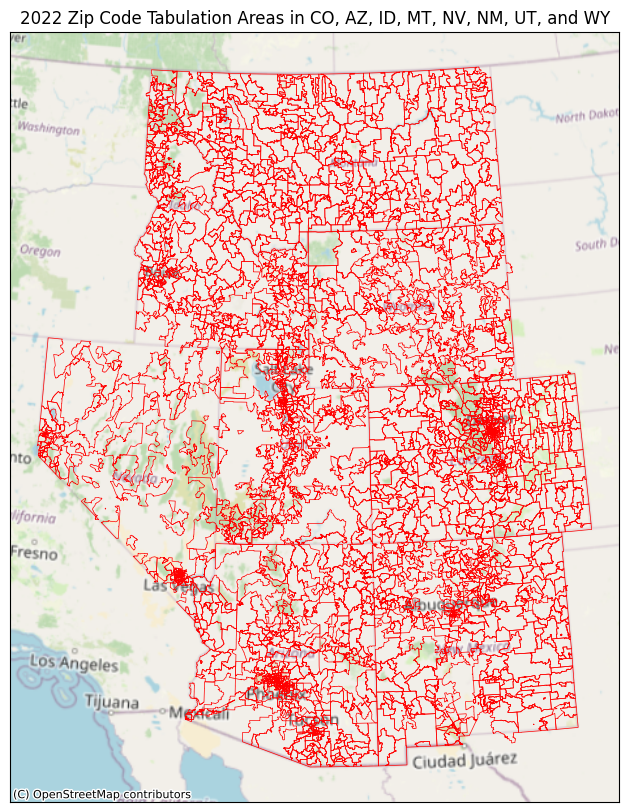

In [6]:
for year, gdf in gdfs_by_year.items():
    ax = cem.plot_map(
        gdf.boundary, color="red", linewidth=0.5, figsize=(10, 10), with_background=True
    )

    ax.set_title(
        f'{year} Zip Code Tabulation Areas in {", and ".join([", ".join(state_abbrevs[:-1]), state_abbrevs[-1]])}'
    )